In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from statsmodels.tools.eval_measures import rmse

# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
# import plotly.plotly as py
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [24]:
class Model:
    
    def get_target(self,df):
        df['return'] = (df['f24'].shift(-78) - df['f24']) / df['f24']
        return df[['return']]
    
    
    def prepare_features(self, df):
        """
        :param df: this is the data you want to use to prepare the features for your model
        :return: X, a matrix of features (can be a numpy array or a pandas dataframe, your choice!)
        
        ## AG: TASKS
        ## Removing columns which have high correlation with each other and 
        ## Convert columns to return format
        ## Missing Value of features -> separate columns on origination
        ## Outlier Treatment -> Check for each variable? Will lose any information
        ## Variable selection
        """
        # todo: implement this function - you can use some of the features given to you or you can build a batch of
        #  your own based on the data that you are given.
        # *** PLEASE ENSURE THAT DO NOT INTRODUCE A LOOKAHEAD IN THIS MATRIX ***
        # *** Bonus points for coding a function that tests against lookahead in X ***
        

        
        X = df[['f1','f2','f3','f11','f12']]
        return X

    
    def fit(self, path_to_train_csv, *args, **kwargs):
        """
        ### AG:  TASKS
        ## Model Selection: 
            Linear: Base Model
            Ridge : Handles Multicollinearity
            RandomForest (large number of uncorrelated features, fail if the potential y values lie outside)
            Time Series
        ## Train-Test Split to get the optimal model
        ## Train complete model
        ## Store the optimal model
        """
        
        # todo: read train csv
        # todo: do any operation you would like on it
#         self.train = pd.read_csv(path_to_train_csv)
        self.train = pd.read_csv(path_to_train_csv, index_col='time', parse_dates=['time'])
        self.train.index = pd.to_datetime(self.train.index, format='%d-%m-%Y %H:%M')
        self.train.sort_index(inplace=True)
        
        # todo: prepare features for the model fit
        self.X = self.prepare_features(self.train)
        self.y = self.get_target(self.train)
        
        ## AG: Drop missing values
        combined = pd.concat([self.X, self.y], axis=1)
        combined_clean = combined.dropna()
        self.X_clean = combined_clean.drop(columns='return')
        self.y_clean = combined_clean['return']
        
        # todo: fit your model here - use X (features matrix), y (the target variable) and any other information you
        #  want to use
        self.model = sm.OLS(self.y_clean,self.X_clean).fit()

        # this follows the scikit-learn pattern by returning self
        return self

    
    def predict(self, path_to_test_csv, *args, **kwargs):
        # todo: read test csv
        # todo: do any operation you would like on it
        self.test = pd.read_csv(path_to_test_csv, index_col='time', parse_dates=['time'])
        self.test.index = pd.to_datetime(self.test.index, format='%d-%m-%Y %H:%M')
        self.test.sort_index(inplace=True)
    
        # todo: prepare features for the model predict
        self.X_test = self.prepare_features(self.test)
        self.y_test = self.get_target(self.test)

        # todo: calculate your model prediction (call it ypred) using X and any other information you want to use
        ypred = pd.Series(np.nan, index=self.X_test.index)
        non_nan_rows = ~self.X_test.isnull().any(axis=1)
        ypred[non_nan_rows] = self.model.predict(self.X_test[non_nan_rows])

        # this follows the scikit-learn pattern by returning ypred
        return ypred

In [25]:
def get_rmse(ypred,ytest):
    combined = pd.concat([ypred, ytest], axis=1)
    combined_clean = combined.dropna()
    
    rmse_ = rmse(combined_clean[0],combined_clean['return'])
    return rmse_

In [5]:
# if __name__ == '__main__':
train_csv_path = '../data/train.csv'
test_csv_path = '../data/test.csv'

fit_args = []  # todo: populate this as you see fit
fit_kwargs = {}  # todo: populate this as you see fit
clf = Model()
clf.fit(train_csv_path, *fit_args, **fit_kwargs)

predict_args = []  # todo: populate this as you see fit
predict_kwargs = {}  # todo: populate this as you see fit
ypred = clf.predict(test_csv_path, *predict_args, **predict_kwargs)

In [7]:
clf.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 return   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              156.0
Date:                Tue, 23 Jan 2024   Prob (F-statistic):                   1.56e-165
Time:                        00:07:12   Log-Likelihood:                      2.0402e+05
No. Observations:               77400   AIC:                                 -4.080e+05
Df Residuals:                   77395   BIC:                                 -4.080e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
f1             0.2115      0.043      4.893      0.000       0.127       0.296
f2            -0.1955      0.061     -3.206      0.001      -0.315      -0.076
f3             0.8483      0.163      5.214      0.000       0.529       1.167
f11            0.0009   9.15e-05      9.955      0.000       0.001       0.001
f12            0.0088      0.000     22.232      0.000       0.008       0.010
==============================================================================
Omnibus:                     7285.732   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24043.432
Skew:                           0.474   Prob(JB):                         0.00
Kurtosis:                       5.560   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
get_rmse(ypred,clf.y_test)

0.014964191895590437

# Residual Analysis

In [35]:
def stationarity_test(ret):
    from statsmodels.tsa.stattools import adfuller
    adf = adfuller(ret.dropna())
    print("p-value: {}".format(float(adf[1])))
    result = [{'Test Statistic':adf[0], 'pvalue':adf[1], 'usedlag':adf[2], 'num_obs':adf[3],'1pct_sig':adf[4]['1%'],
           '5pct_sig':adf[4]['5%'],'10pct_sig':adf[4]['10%'], 'best_ic':adf[5]}]
    return result

In [36]:
stationarity_test(clf.model.resid)

p-value: 0.0


[{'Test Statistic': -30.149652836102806,
  'pvalue': 0.0,
  'usedlag': 64,
  'num_obs': 77335,
  '1pct_sig': -3.4304345608982856,
  '5pct_sig': -2.8615773744715267,
  '10pct_sig': -2.566789893144404,
  'best_ic': -688413.9507676977}]

In [37]:
stationarity_test(clf.y)

p-value: 0.0


[{'Test Statistic': -30.71248859990385,
  'pvalue': 0.0,
  'usedlag': 64,
  'num_obs': 79856,
  '1pct_sig': -3.430431891282005,
  '5pct_sig': -2.861576194563048,
  '10pct_sig': -2.566789265116908,
  'best_ic': -726017.2698021678}]

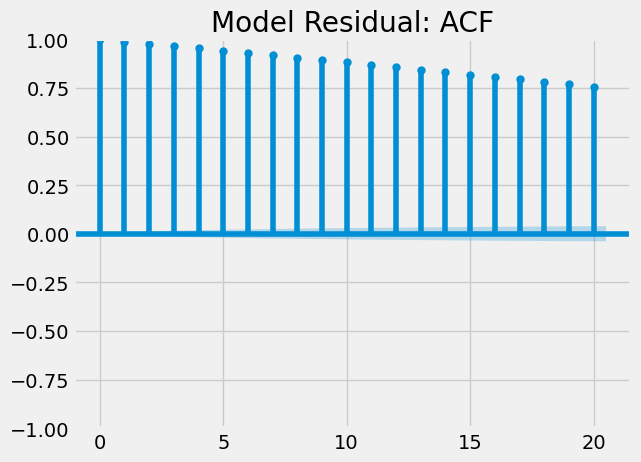

In [54]:
plot_acf(clf.model.resid.dropna(),lags=20,title='Model Residual: ACF')
plt.show()

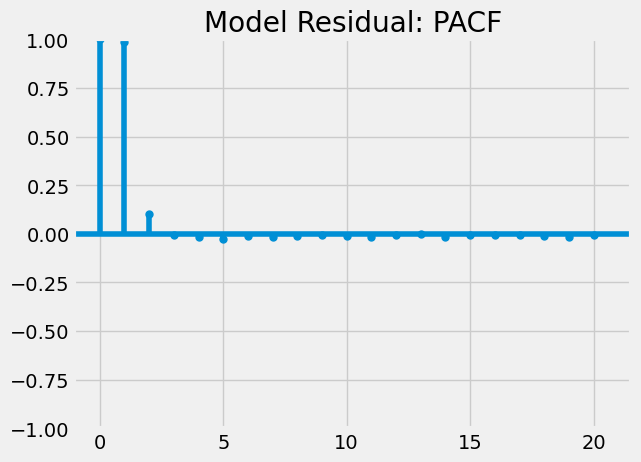

In [55]:
plot_pacf(clf.model.resid.dropna(),lags=20,title='Model Residual: PACF')
plt.show()

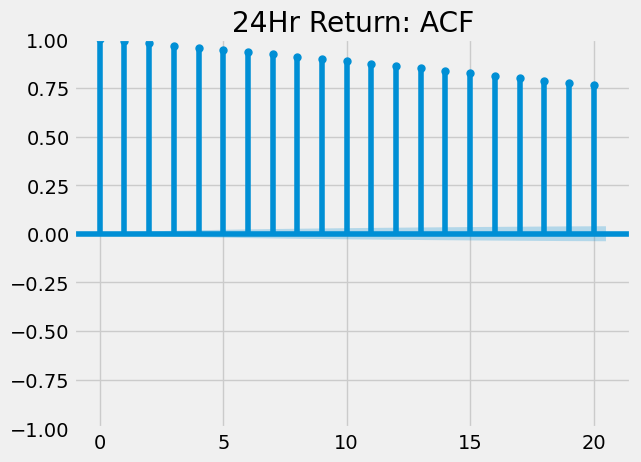

In [50]:
plot_acf(clf.y.dropna(),lags=20,title='24Hr Return: ACF')
plt.show()

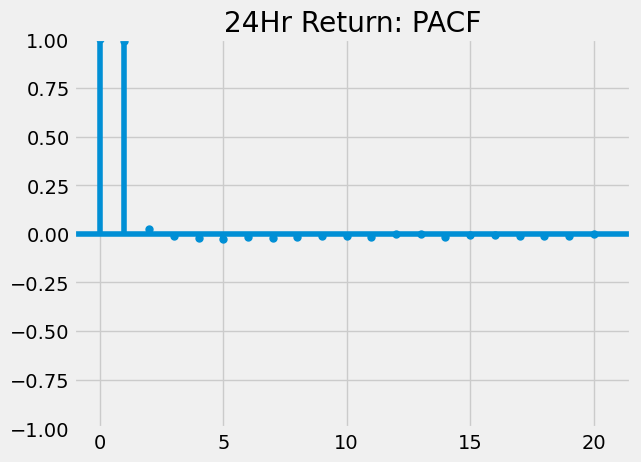

In [52]:
plot_pacf(clf.y.dropna(),lags=20,title='24Hr Return: PACF')
plt.show()

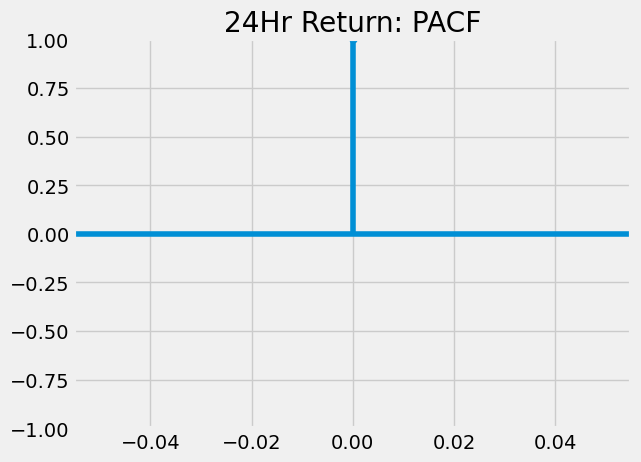

In [44]:
plot_pacf(clf.y,lags=5,title='24Hr Return: PACF')
plt.show()

# Cross Validation

In [57]:
# # Set the window sizes for the training and test sets
# train_window = 50  # For example, adjust this based on your data
# test_window = 10   # For example, adjust this as needed

# # Calculate the number of splits
# num_splits = (len(df) - train_window) // test_window

# # Initialize a Linear Regression model (or any other model of your choice)
# model = LinearRegression()

# # Perform the cross-validation
# for split in range(num_splits):
#     # Define the start and end indices of the training and test sets
#     train_start = split * test_window
#     train_end = train_start + train_window
#     test_end = train_end + test_window

#     # Create training and test sets
#     X_train = X.iloc[train_start:train_end]
#     y_train = y.iloc[train_start:train_end]
#     X_test = X.iloc[train_end:test_end]
#     y_test = y.iloc[train_end:test_end]

#     # Fit the model and evaluate
#     model.fit(X_train, y_train)
#     score = model.score(X_test, y_test)
#     print(f"Split {split}: Model Score = {score}")

#     # Optionally, make predictions and further analysis
#     # predictions = model.predict(X_test)


In [138]:
combined = pd.concat([clf.X, clf.y], axis=1)

combined

# Drop rows with any NaNs in either X or y
combined_clean = combined.dropna()

combined_clean

# Separate the cleaned X and y
X_clean = combined_clean.drop(columns='return')
y_clean = combined_clean['return']

X_clean

y_clean

model = sm.OLS(y_clean,X_clean).fit()
print(model.summary())

In [158]:
model.resid
from statsmodels.tsa.stattools import adfuller
adf = adfuller(y_clean)

In [159]:
adf

(-29.78563797149838,
 0.0,
 64,
 77335,
 {'1%': -3.4304345608982856,
  '5%': -2.8615773744715267,
  '10%': -2.566789893144404},
 -699776.0585136897)

In [160]:
def white_noise_test(ret):
    import statsmodels.api as sm
    return sm.stats.acorr_ljungbox(ret, lags=[10,20,30,40], return_df=True)

In [161]:
white_noise_test(y_clean),white_noise_test(model.resid)

(         lb_stat  lb_pvalue
 10  6.816041e+05        0.0
 20  1.199359e+06        0.0
 30  1.572478e+06        0.0
 40  1.825453e+06        0.0,
          lb_stat  lb_pvalue
 10  6.776872e+05        0.0
 20  1.189895e+06        0.0
 30  1.556148e+06        0.0
 40  1.801614e+06        0.0)

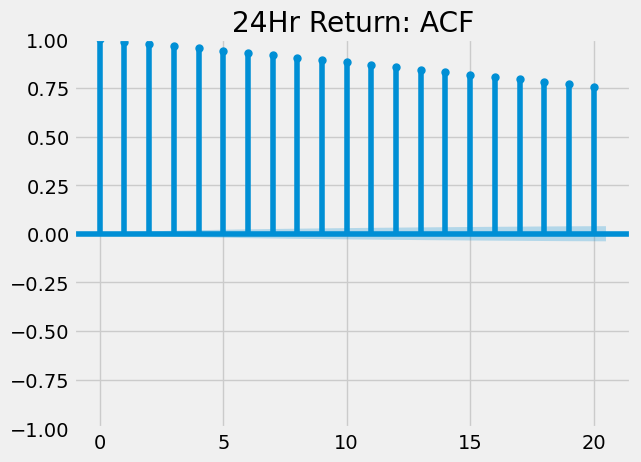

In [164]:
plot_acf(model.resid,lags=20,title='24Hr Return: ACF')
plt.show()

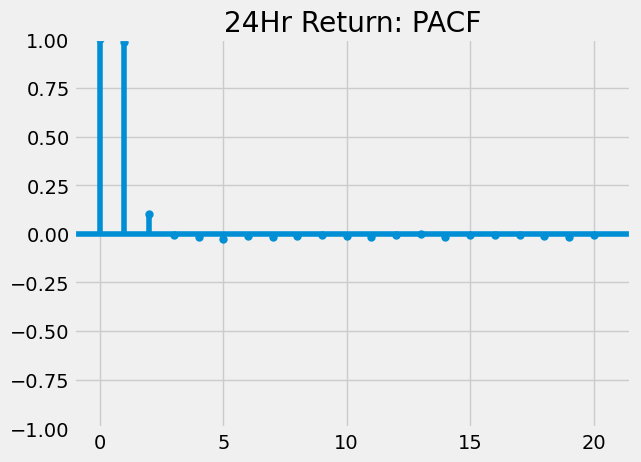

In [165]:
plot_pacf(model.resid,lags=20,title='24Hr Return: PACF')
plt.show()

In [168]:
clf.train.to_csv('../data/train_read.csv')

In [169]:
clf.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 return   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              156.0
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                   1.56e-165
Time:                        16:24:31   Log-Likelihood:                      2.0402e+05
No. Observations:               77400   AIC:                                 -4.080e+05
Df Residuals:                   77395   BIC:                                 -4.080e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
f1             0.2115      0.043      4.893      0.000       0.127       0.296
f2            -0.1955      0.061     -3.206      0.001      -0.315      -0.076
f3             0.8483      0.163      5.214      0.000       0.529       1.167
f11            0.0009   9.15e-05      9.955      0.000       0.001       0.001
f12            0.0088      0.000     22.232      0.000       0.008       0.010
==============================================================================
Omnibus:                     7285.732   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24043.432
Skew:                           0.474   Prob(JB):                         0.00
Kurtosis:                       5.560   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
clf.predict(test_csv_path, *fit_args, **fit_kwargs)

In [114]:
clf.test

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f70,f71,f72,f73,f74,f75,f76,f77,f78,return
time,,,,,,,,,,,,,,,,,,,,,
2019-12-04 14:12:00,-0.000234,0.000885,0.000107,-0.000333,86.68,12.60,12.54,12.54,13.81,12.54,...,1.3320,1.3315,1.0004,1.3320,1.3311,1.0007,NaN,879.0,73.0,0.012147
2019-12-04 14:17:00,-0.000734,-0.001838,-0.000075,0.000329,86.74,12.59,12.51,12.51,13.81,12.51,...,1.3319,1.3316,1.0003,1.3320,1.3312,1.0006,NaN,1867.0,64.0,0.014783
2019-12-04 14:22:00,0.001492,0.000412,0.000129,0.000320,86.69,12.55,12.45,12.45,13.76,12.45,...,1.3325,1.3318,1.0005,1.3325,1.3313,1.0009,NaN,1447.0,52.0,0.015089
2019-12-04 14:27:00,-0.000717,-0.000260,0.000080,-0.000136,86.69,12.56,12.46,12.47,13.77,12.46,...,1.3324,1.3319,1.0003,1.3325,1.3314,1.0008,NaN,1032.0,52.0,0.013458
2019-12-04 14:32:00,0.000343,0.001192,0.000263,-0.000252,86.50,12.57,12.47,12.47,13.78,12.47,...,1.3323,1.3319,1.0003,1.3324,1.3314,1.0007,NaN,897.0,37.0,0.013290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07 14:11:00,-0.000019,0.000390,0.000007,-0.000126,99.52,11.00,11.06,11.01,12.08,11.06,...,1.4803,1.4799,1.0003,1.4806,1.4799,1.0005,NaN,697.0,38.0,NaN
2020-12-07 14:16:00,0.000281,0.000352,0.000380,-0.000022,99.60,11.01,11.08,11.03,12.10,11.08,...,1.4802,1.4798,1.0003,1.4805,1.4797,1.0005,NaN,940.0,62.0,NaN
2020-12-07 14:21:00,-0.000741,-0.000277,-0.000005,-0.000143,99.40,11.02,11.08,11.04,12.11,11.08,...,1.4802,1.4797,1.0003,1.4805,1.4797,1.0005,2364.500,612.0,43.0,NaN


In [115]:
clf.X_test

,f1,f2,f3,f11,f12
time,,,,,
2019-12-04 14:12:00,0.000885,0.000107,-0.000333,NaN,NaN
2019-12-04 14:17:00,-0.001838,-0.000075,0.000329,NaN,NaN
2019-12-04 14:22:00,0.000412,0.000129,0.000320,NaN,NaN
2019-12-04 14:27:00,-0.000260,0.000080,-0.000136,NaN,NaN
2019-12-04 14:32:00,0.001192,0.000263,-0.000252,NaN,NaN
...,...,...,...,...,...
2020-12-07 14:11:00,0.000390,0.000007,-0.000126,0.7433,-0.0516
2020-12-07 14:16:00,0.000352,0.000380,-0.000022,0.7478,-0.0497
2020-12-07 14:21:00,-0.000277,-0.000005,-0.000143,0.7488,-0.0504


In [119]:
clf.y_test[-90:-70]

,return
time,
2020-12-04 13:37:00,-0.003913
2020-12-04 13:42:00,-0.003264
2020-12-04 13:47:00,-0.002612
2020-12-04 13:52:00,-0.001632
2020-12-04 13:57:00,0.000981
2020-12-04 14:02:00,0.001471
2020-12-04 14:07:00,0.000327
2020-12-04 14:12:00,-0.000327
2020-12-04 14:17:00,-0.001468


In [120]:
clf.X

,f1,f2,f3,f11,f12
time,,,,,
2015-11-18 09:30:00,0.000000,0.000000,0.000000,0.9609,0.0413
2015-11-18 09:35:00,-0.001088,0.000058,0.000615,0.9901,0.0329
2015-11-18 09:40:00,0.004110,0.001356,0.000040,1.0194,0.0060
2015-11-18 09:45:00,0.008612,0.006797,-0.001845,1.0168,-0.0055
2015-11-18 09:50:00,-0.005846,-0.003133,0.001615,1.0254,0.0011
...,...,...,...,...,...
2019-12-04 13:47:00,0.000500,0.000294,-0.000553,NaN,NaN
2019-12-04 13:52:00,-0.002620,-0.001099,0.000085,NaN,NaN
2019-12-04 13:57:00,-0.001153,-0.000720,0.000245,NaN,NaN


In [121]:
clf.X_test

,f1,f2,f3,f11,f12
time,,,,,
2019-12-04 14:12:00,0.000885,0.000107,-0.000333,NaN,NaN
2019-12-04 14:17:00,-0.001838,-0.000075,0.000329,NaN,NaN
2019-12-04 14:22:00,0.000412,0.000129,0.000320,NaN,NaN
2019-12-04 14:27:00,-0.000260,0.000080,-0.000136,NaN,NaN
2019-12-04 14:32:00,0.001192,0.000263,-0.000252,NaN,NaN
...,...,...,...,...,...
2020-12-07 14:11:00,0.000390,0.000007,-0.000126,0.7433,-0.0516
2020-12-07 14:16:00,0.000352,0.000380,-0.000022,0.7478,-0.0497
2020-12-07 14:21:00,-0.000277,-0.000005,-0.000143,0.7488,-0.0504


In [43]:
clf.get_target(clf.train)[5:]

,time,return
5,18-11-2015 09:55,-0.016233
6,18-11-2015 10:00,-0.013130
7,18-11-2015 10:05,-0.015998
8,18-11-2015 10:10,-0.014082
9,18-11-2015 10:15,-0.012972
...,...,...
79994,04-12-2019 13:47,NaN
79995,04-12-2019 13:52,NaN
79996,04-12-2019 13:57,NaN
79997,04-12-2019 14:02,NaN


In [56]:
clf.train

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f70,f71,f72,f73,f74,f75,f76,f77,f78,return
time,,,,,,,,,,,,,,,,,,,,,
2015-11-18 09:30:00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,NaN,NaN,NaN,-0.001000
2015-11-18 09:35:00,0.001689,-0.001088,0.000058,0.000615,85.97,NaN,NaN,NaN,15.53,14.64,...,1.0006,1.0001,1.0005,1.0006,1.0000,1.0006,67368.45,11762.0,933.0,-0.001797
2015-11-18 09:40:00,0.004288,0.004110,0.001356,0.000040,85.90,NaN,NaN,NaN,15.46,14.72,...,1.0012,1.0003,1.0009,1.0013,1.0001,1.0012,46947.15,7726.0,469.0,-0.009642
2015-11-18 09:45:00,0.000268,0.008612,0.006797,-0.001845,85.84,NaN,NaN,NaN,15.74,14.98,...,1.0007,0.9988,1.0019,1.0012,0.9988,1.0024,23487.70,5967.0,398.0,-0.009341
2015-11-18 09:50:00,0.001404,-0.005846,-0.003133,0.001615,85.15,NaN,NaN,NaN,15.76,14.96,...,1.0004,0.9991,1.0013,1.0010,0.9989,1.0022,40561.20,6341.0,393.0,-0.010519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-04 13:47:00,-0.001358,0.000500,0.000294,-0.000553,87.49,12.70,12.60,12.61,13.89,12.60,...,1.3317,1.3311,1.0005,1.3318,1.3309,1.0006,NaN,1208.0,104.0,NaN
2019-12-04 13:52:00,-0.002336,-0.002620,-0.001099,0.000085,86.92,12.69,12.61,12.61,13.87,12.60,...,1.3316,1.3311,1.0003,1.3317,1.3309,1.0006,NaN,1292.0,115.0,NaN
2019-12-04 13:57:00,-0.000329,-0.001153,-0.000720,0.000245,86.97,12.67,12.60,12.60,13.86,12.60,...,1.3315,1.3312,1.0002,1.3317,1.3310,1.0005,NaN,603.0,101.0,NaN


In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Example DataFrame X and Series y
# X = pd.DataFrame(...)  # Your DataFrame with explanatory variables
# y = pd.Series(...)     # Your Series with the target variable

# Ensure the DataFrame is sorted by time
X.sort_values(by='time_column', inplace=True)  # Replace 'time_column' with your time column name
y = y.loc[X.index]  # Align y with the sorted X

# Initialize TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Linear Regression Model
model = LinearRegression()

# Loop over folds
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Test MSE: {mse}")

# Final model
model.fit(X, y)


In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()